In [73]:
#summarise performance of multiple settings across multiple random seeds
import yaml
from collections import defaultdict
grouped_records = defaultdict(list)
for (experiment_prefix, folder) in [('fullCtcf', 'Ctcf'), ('Spi1', 'Spi1'), ('Max', 'Max')]:
    db_records = yaml.load(open(folder+"/runs_perf-metric-auROC.db").read())['records']
    filtered_records = [x for x in db_records if experiment_prefix in x['message']]
    for filtered_record in filtered_records:
        experiment_prefix, model_descriptor, seed = filtered_record['message'].split()
        grouped_records[experiment_prefix+"_"+model_descriptor].append(filtered_record)

In [74]:
auroc_per_group = dict([(key, [x['best_valid_perf_info']['valid_all_stats']['mean_auROC'] for x in grouped_records[key]])
                        for key in grouped_records])
auprc_per_group = dict([(key, [x['best_valid_perf_info']['valid_all_stats']['mean_auPRC'] for x in grouped_records[key]])
                        for key in grouped_records])

In [75]:
for key in auroc_per_group:
    print (key.replace("-","_")+"<- c("+",".join([str(x) for x in auroc_per_group[key]])+")")
print("wilcox.test(Max_rc_t_nbf_16_ws_t_symws_f_ircws_t_str_20, Max_32_rc_t_nbf_32_ws_t_symws_f_ircws_t_str_20, alternative=\"less\")")

Spi1_32_rc_f_nbf_32_ws_f_str_20<- c(0.988110546045,0.988047282889,0.988005682155,0.987927346269,0.987852469178,0.987818050467,0.98776914078,0.987399007421,0.98737818061,0.987353831541)
Max_32_rc_t_nbf_32_ws_t_symws_f_ircws_t_str_20<- c(0.927856816444,0.927161885122,0.926820591143,0.926378047302,0.925672624122,0.924910455761,0.924693898319,0.924105634224,0.923948084914,0.92208032841)
Spi1_rc_f_nbf_16_ws_f_str_20<- c(0.986857975748,0.986426906251,0.986337178554,0.986302876194,0.986010126759,0.985920145206,0.985880152229,0.985787314791,0.985758089561,0.985303559491)
Max_rc_t_nbf_16_ws_t_symws_f_ircws_t_str_20<- c(0.925926143078,0.925383275128,0.924170745462,0.923969205779,0.923613785506,0.923505986805,0.923091249818,0.922156822972,0.921745240399,0.921736085739)
fullCtcf_rc_f_nbf_16_ws_f_str_20<- c(0.976970339124,0.975470854407,0.975147756263,0.975107086205,0.975107034594,0.974819032438,0.974765941153,0.974196663572,0.974006173212,0.973244512841)
fullCtcf_rc_t_nbf_16_ws_t_symws_f_ircws_t_s

In [76]:
for key in auprc_per_group:
    print (key.replace("-","_")+"<- c("+",".join([str(x) for x in auprc_per_group[key]])+")")
print("wilcox.test(Max_rc_t_nbf_16_ws_t_symws_f_ircws_t_str_20, Max_32_rc_t_nbf_32_ws_t_symws_f_ircws_t_str_20, alternative=\"less\")")

Spi1_32_rc_f_nbf_32_ws_f_str_20<- c(0.971459821206,0.971288454638,0.9713041554,0.970790877809,0.971672548364,0.971680801722,0.970805356977,0.969217720747,0.970304546713,0.97030499781)
Max_32_rc_t_nbf_32_ws_t_symws_f_ircws_t_str_20<- c(0.679318632641,0.690632534261,0.684041334705,0.691122962577,0.692689479069,0.6831949861,0.683248961516,0.683072002327,0.684921237054,0.669317629895)
Spi1_rc_f_nbf_16_ws_f_str_20<- c(0.968904032259,0.967706982073,0.966533634076,0.966791589919,0.966101095521,0.965779445054,0.965434416059,0.965914777825,0.96667664857,0.965427301933)
Max_rc_t_nbf_16_ws_t_symws_f_ircws_t_str_20<- c(0.685609148463,0.68986074167,0.673979923441,0.670717509826,0.669841487942,0.677339055947,0.672959863915,0.672973409076,0.645370089679,0.654403773917)
fullCtcf_rc_f_nbf_16_ws_f_str_20<- c(0.952156409379,0.950745863935,0.949613395735,0.948599413816,0.950037790511,0.950299316313,0.949607719041,0.948940460784,0.948825526117,0.946485396529)
fullCtcf_rc_t_nbf_16_ws_t_symws_f_ircws_t_str_2

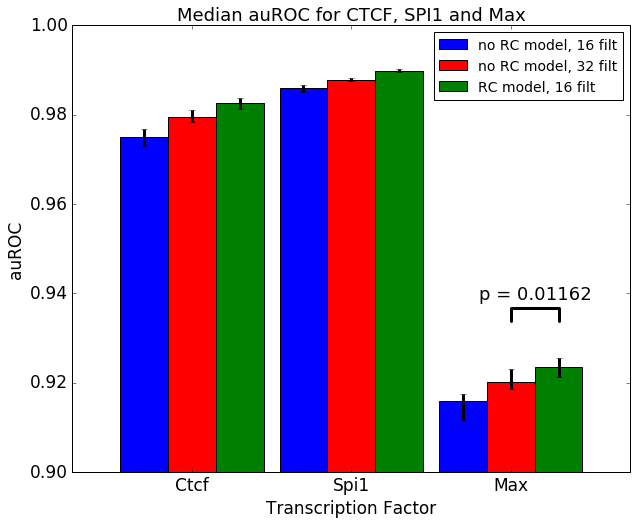

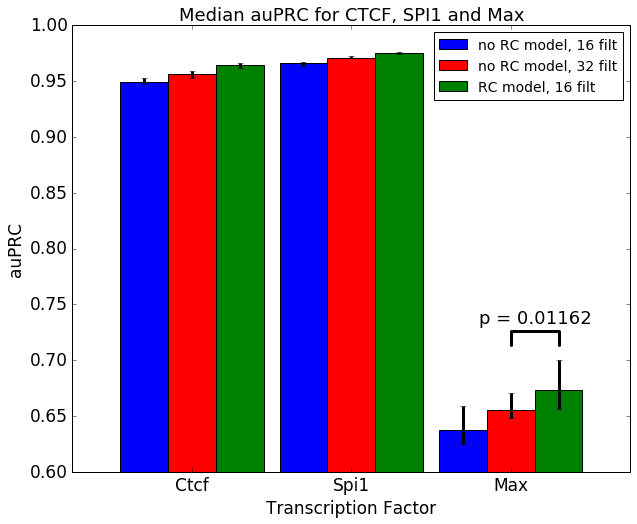

In [131]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

without_rc_keys = ['fullCtcf_rc-f_nbf-16_ws-f_str-20',
                   'Spi1_rc-f_nbf-16_ws-f_str-20',
                   'Max_rc-f_nbf-16_ws-f_str-20']
without_rc_2x_filt_keys = ['fullCtcf-32_rc-f_nbf-32_ws-f_str-20',
                           'Spi1-32_rc-f_nbf-32_ws-f_str-20',
                           'Max-32_rc-f_nbf-32_ws-f_str-20']
with_rc_keys = ['fullCtcf_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20',
                'Spi1_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20',
                'Max_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20']


def label_diff(i,j,text,X,Y,yrange):
    y = 1.0*max(Y[i], Y[j])

    y = y + 0.1*yrange
    
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':1,'shrinkB':1,'lw':3}
    ax.annotate(text, xy=(X[i]-0.2,y+yrange*0.05), zorder=10, fontsize=18)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

for group_stats, stats_name, ymin in [(auroc_per_group, 'auROC', 0.9), (auprc_per_group, 'auPRC', 0.6)]:

    N = 3
    ind = np.arange(N)  # the x locations for the groups
    width = 0.3       # the width of the bars
    fig, ax = plt.subplots(figsize=(10,8))

    
    all_rects = []
    series_medians = []
    
    for series_idx, (series, color) in enumerate([(without_rc_keys, 'b'), (without_rc_2x_filt_keys, 'r'), (with_rc_keys, 'g')]):
        median = np.array([np.median(group_stats[x]) for x in series])
        series_medians.append(median)
        upper_error = np.array([np.max(group_stats[x]) for x in series]) - median
        lower_error = np.abs(np.array([np.min(group_stats[x]) for x in series]) - median)
        rects = ax.bar(ind + width*series_idx, median, width,
                       color=color, yerr=[upper_error, lower_error],
                       ecolor='k', error_kw={'elinewidth':3})
        all_rects.append(rects)
        
    # add some text for labels, title and axes ticks
    ax.set_ylabel(stats_name, fontsize=17)
    ax.set_ylim(ymin,1.0)
    ax.set_title("Median "+stats_name+' for CTCF, SPI1 and Max', fontsize=18)
    ax.set_xticks(ind + 3*width / 2.0)
    ax.set_xticklabels(('Ctcf', 'Spi1', 'Max'))
    ax.set_xlabel(('Transcription Factor'), fontsize=17)
    plt.tick_params(labelsize=17)
    ax.set_xlim(-width, N-1+4*width)
    ax.legend((all_rects[0][0], all_rects[1][0], all_rects[2][0]), ('no RC model, 16 filt',
                                                                    'no RC model, 32 filt',
                                                                    'RC model, 16 filt'), loc=1, fontsize=14)
    #comes out to 0.01162 for both
    label_diff(1,2, "p = 0.01162", X=2+(np.arange(3)+0.5)*width, Y=[x[-1] for x in series_medians], yrange=1.0-ymin)
    plt.show()